## 🐍 Visualización de Datos
### 👤 Desarrollado por: Nancy Borges


### Importamos nuestros paquetes y definimos la ruta

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


In [2]:
path= r'C:\Users\Outlet\Desktop\Nueva carpeta'
list_orders = pd.read_csv(path+'\List of Orders.csv',sep=';',header=0,index_col=False,encoding='latin-1',engine='python')
order_details = pd.read_csv(path+'\Order Details.csv',sep=',',header=0,index_col=False,encoding='latin-1',engine='python')



In [3]:
list_orders.head()


Order ID  Order Date CustomerName           State       City
0  B-25601  01/04/2018       Bharat         Gujarat  Ahmedabad
1  B-25602  01/04/2018        Pearl     Maharashtra       Pune
2  B-25603  03/04/2018        Jahan  Madhya Pradesh     Bhopal
3  B-25604  03/04/2018       Divsha       Rajasthan     Jaipur
4  B-25605  05/04/2018      Kasheen     West Bengal    Kolkata

In [4]:
order_details.head()


Order ID  Amount  Profit  Quantity     Category      Sub-Category
0  B-25601  1275.0 -1148.0         7    Furniture         Bookcases
1  B-25601    66.0   -12.0         5     Clothing             Stole
2  B-25601     8.0    -2.0         3     Clothing       Hankerchief
3  B-25601    80.0   -56.0         4  Electronics  Electronic Games
4  B-25602   168.0  -111.0         2  Electronics            Phones

### Transformación De Datos

In [5]:
# Aseguramos que la columna sea tratada como texto puro para limpiar errores previos
list_orders['Order Date'] = list_orders['Order Date'].astype(str)

# Usamos dayfirst=True para que entienda que el primer número es el DÍA
# Esto rescatará los datos de 2018 que se borraban
list_orders['Order Date'] = pd.to_datetime(list_orders['Order Date'], dayfirst=True, errors='coerce')

# Borramos las filas que REALMENTE no tengan fecha (los nulos de los que hablamos)
list_orders.dropna(subset=['Order Date'], inplace=True)

# Creamos las columnas de Año y Mes como números enteros
list_orders['Anio'] = list_orders['Order Date'].dt.year.astype(int)
list_orders['Mes'] = list_orders['Order Date'].dt.month.astype(int)


In [6]:
#Unir Bases
df = pd.merge(list_orders,order_details,
              left_on = 'Order ID',
              right_on = 'Order ID')
df.shape

(1500, 12)

In [7]:
df_mes = pd.DataFrame(df.groupby(['Mes'])[['Amount', 'Quantity']].sum()).reset_index()
df_mes

Mes   Amount  Quantity
0     1  61439.0       745
1     2  38424.0       512
2     3  58937.0       751
3     4  32726.0       389
4     5  28545.0       423
5     6  23658.0       369
6     7  12966.0       240
7     8  30899.0       446
8     9  26628.0       331
9    10  31615.0       419
10   11  48086.0       578
11   12  37579.0       412

### 📈 Gráficos de líneas

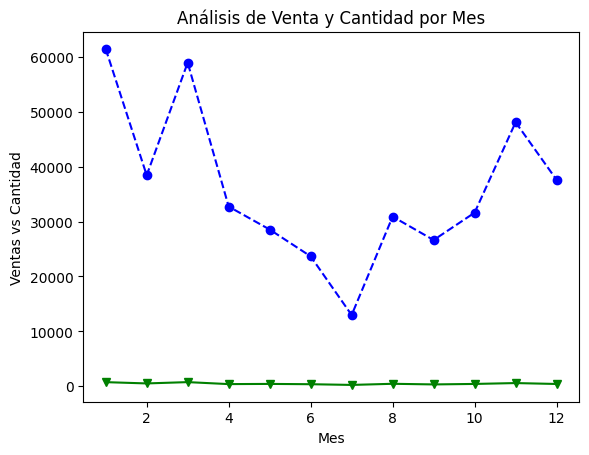

In [8]:
fig, ax = plt.subplots()
ax.plot(df_mes['Mes'],df_mes['Amount'],
       marker = 'o', linestyle = '--',color='b')
ax.plot(df_mes['Mes'],df_mes['Quantity'],
       marker='v', color='g')
ax.set_xlabel('Mes')
ax.set_ylabel('Ventas vs Cantidad')
ax.set_title('Análisis de Venta y Cantidad por Mes')
plt.show()

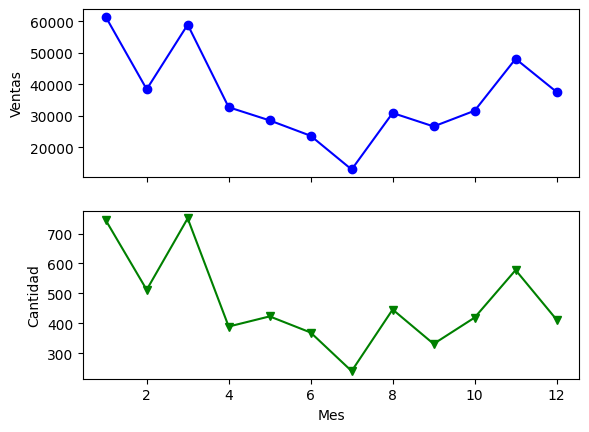

In [9]:
fig, ax= plt.subplots(2,1,sharex=True)
ax[0].plot(df_mes['Mes'],df_mes['Amount'],
          marker='o', linestyle='-', color='b')
ax[1].plot(df_mes['Mes'],df_mes['Quantity'],
          marker='v',linestyle= None, color='g')
ax[0].set_ylabel('Ventas')
ax[1].set_ylabel('Cantidad')
ax[1].set_xlabel('Mes')
plt.show()

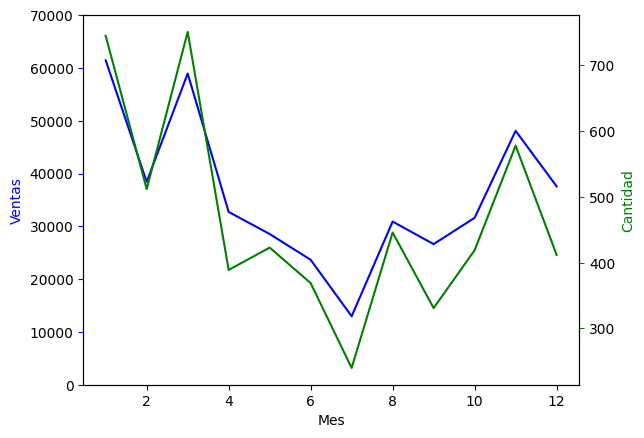

In [10]:
fig, ax = plt.subplots()
ax.plot(df_mes['Mes'],df_mes['Amount'],color='b')
ax.set_xlabel('Mes')
ax.set_ylabel('Ventas',color='b')
ax.tick_params('y',color='b')
ax2 = ax.twinx()
ax2.plot(df_mes['Mes'],df_mes['Quantity'],color='g')
ax2.set_xlabel('Mes')
ax2.set_ylabel('Cantidad',color='g')
ax2.tick_params('y',color='g')
ax.set_ylim(0,70000)
plt.show()

### 📊 Gráficos de barra

In [11]:
df_categoria= pd.DataFrame(df.groupby(['Category'])[['Amount','Quantity']].sum())

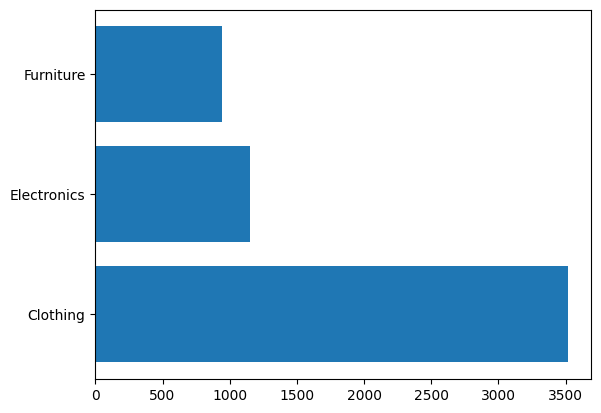

In [12]:
fig, ax = plt.subplots()
ax.barh(df_categoria.index, df_categoria['Quantity'])
plt.show()

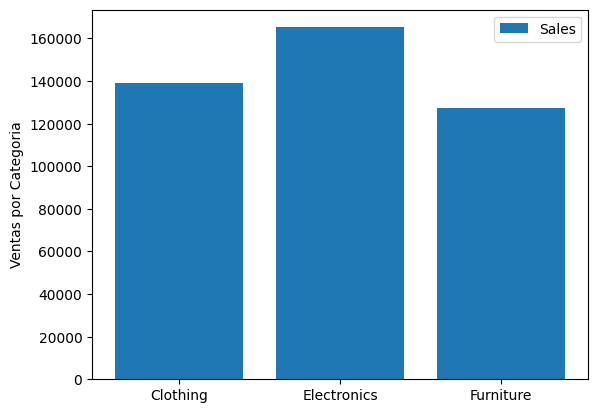

In [13]:
fig,ax= plt.subplots()
ax.bar(df_categoria.index, df_categoria['Amount'],label='Sales')
ax.legend()
ax.set_ylabel('Ventas por Categoria')
plt.show()

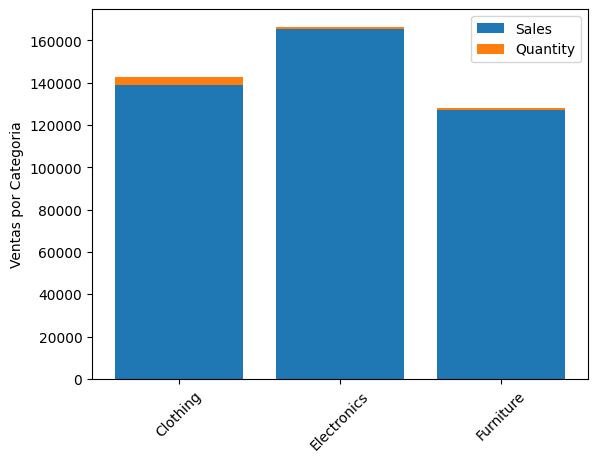

In [14]:
fig, ax = plt.subplots()

# Creamos las barras apiladas
ax.bar(df_categoria.index, df_categoria['Amount'], label='Sales')
ax.bar(df_categoria.index, df_categoria['Quantity'], 
       bottom=df_categoria['Amount'], label='Quantity')

ax.legend()
ax.set_ylabel('Ventas por Categoria')
ax.set_xticks(range(len(df_categoria.index))) 
ax.set_xticklabels(df_categoria.index, rotation=45) 

fig.savefig('grafico_bar1.png', dpi=200)
plt.show()

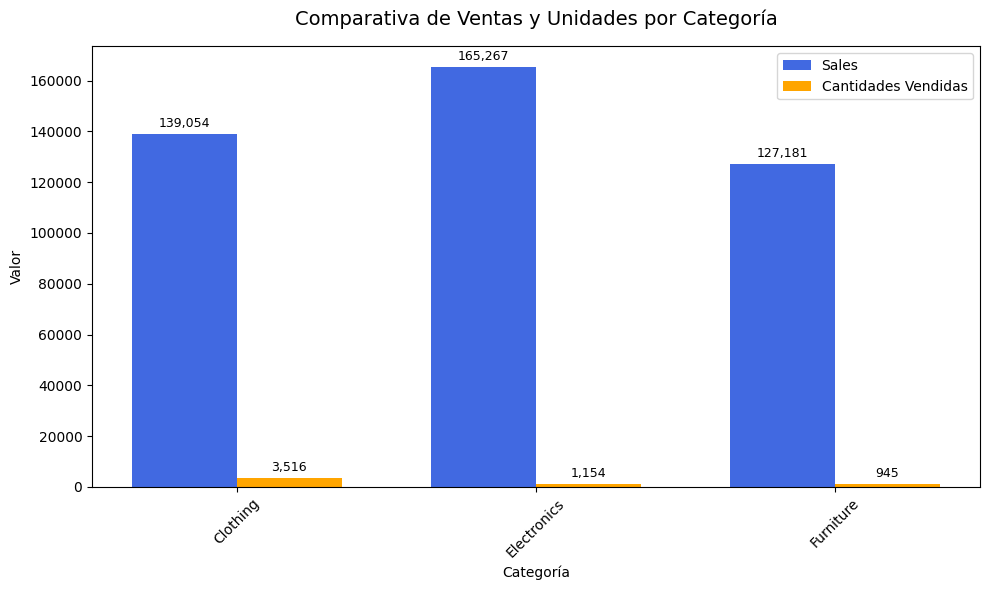

In [15]:
width = 0.35
fig, ax = plt.subplots(figsize=(10, 6)) # Un poco más ancho para que entren las etiquetas
x = np.arange(len(df_categoria.index))

# BARRA 1: Restamos la mitad del ancho para moverla a la izquierda
rects1 = ax.bar(x - width/2, df_categoria['Amount'], width, label='Sales', color='royalblue')

# BARRA 2: Sumamos la mitad del ancho para moverla a la derecha
rects2 = ax.bar(x + width/2, df_categoria['Quantity'], width, label='Cantidades Vendidas', color='orange')

ax.set_title('Comparativa de Ventas y Unidades por Categoría', fontsize=14, pad=15)
ax.set_xlabel('Categoría')
ax.set_ylabel('Valor')
ax.set_xticks(x) # Definimos los puntos exactos
ax.set_xticklabels(df_categoria.index, rotation=45) 


ax.legend()

def autolabel(ax, rects):
    """Función para agregar una etiqueta con el valor de cada barra"""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:,.0f}', # Formateamos con coma para miles
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), # 3 puntos de elevación sobre la barra
                    textcoords='offset points',
                    ha='center', va='bottom', fontsize=9)

autolabel(ax, rects1)
autolabel(ax, rects2)

fig.tight_layout()
plt.show()

### 🎯 Gráficos de dispersión

In [16]:
df_fecha = pd.DataFrame(df.groupby(['Order Date','Anio'])[['Amount','Quantity']].sum()).reset_index()

In [17]:
per_19= df_fecha[df_fecha['Anio']==2019]
per_18= df_fecha[df_fecha['Anio']==2018]

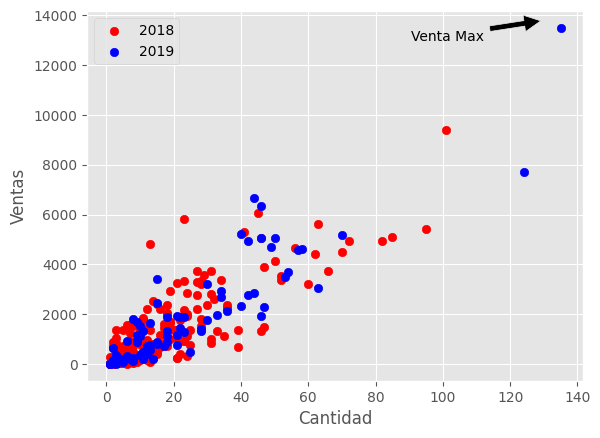

In [18]:
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.scatter(per_18['Quantity'],per_18['Amount'], color='red', label= '2018')
ax.scatter(per_19['Quantity'],per_19['Amount'], color='blue', label= '2019')
ax.annotate('Venta Max', xy=(130,13800), xycoords='data',
            xytext=(0.8,0.95), textcoords= 'axes fraction',
           arrowprops=dict(facecolor='black',shrink=0.05),
           horizontalalignment='right', verticalalignment='top')
ax.set_xlabel('Cantidad')
ax.set_ylabel('Ventas')
ax.legend()
plt.show()

### 📦 Gráficos boxplot

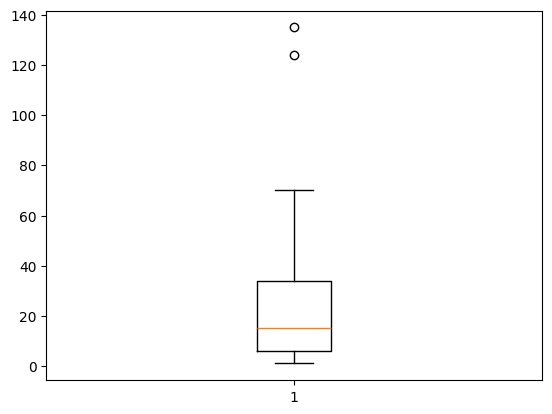

In [19]:
plt.style.use('default')
fig, ax= plt.subplots()
ax.boxplot(per_19['Quantity'])
plt.show()


In [20]:


path=r'C:\Users\Outlet\Desktop\Nueva carpeta\Video_Games.csv'
Video_Games= pd.read_csv(path,sep=';',header=0,index_col=False,encoding='latin-1',engine='python')

path1=r'C:\Users\Outlet\Desktop\Nueva carpeta\Pokemon.csv'
Pokemon= pd.read_csv(path1,sep=';',header=0,index_col=False,encoding='latin-1',engine='python')




In [21]:
Video_Games.head()

Name Platform Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii            2006        Sports  Nintendo   
1         Super Mario Bros.      NES            1985      Platform  Nintendo   
2            Mario Kart Wii      Wii            2008        Racing  Nintendo   
3         Wii Sports Resort      Wii            2009        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB            1996  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating  
0          51.0          8       322.0  Nintendo      E  
1           NaN        NaN         NaN       NaN    NaN  
2          73.0        8.3       709.0  Nintendo      E  
3          73.0          8       192.0  Nintendo      E  
4           NaN        NaN         NaN       NaN    NaN

In [22]:
Pokemon.head()

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

### 📦 Histograma

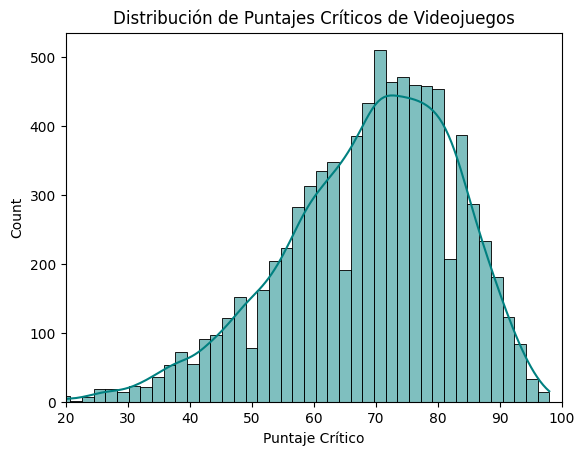

In [23]:
fig, ax = plt.subplots()
sns.histplot(Video_Games['Critic_Score'], kde=True, color='teal', ax=ax)
ax.set(xlabel='Puntaje Crítico', xlim=(20,100), title='Distribución de Puntajes Críticos de Videojuegos')
plt.show()

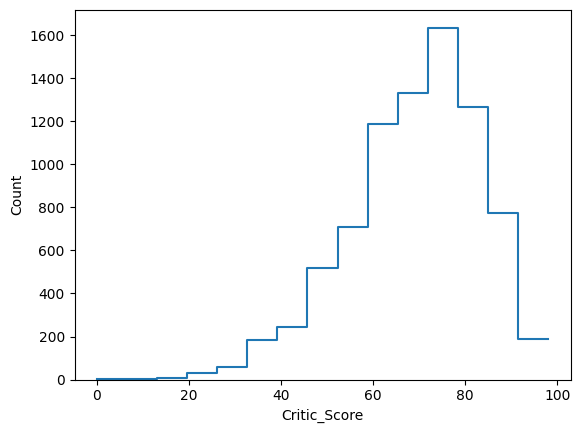

In [24]:
sns.histplot(Video_Games['Critic_Score'], kde=False, bins=15, fill=False, element='step')
plt.show()

### 📈 Gráfico de densidad 

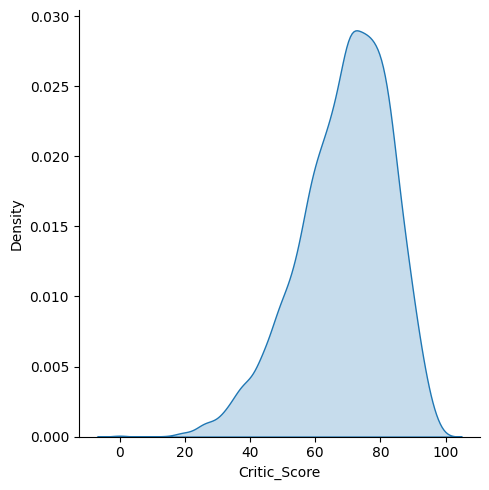

In [25]:
sns.displot(data=Video_Games['Critic_Score'], kind='kde', fill=True)
plt.show()

### 🐝 Gráficos de enjambre

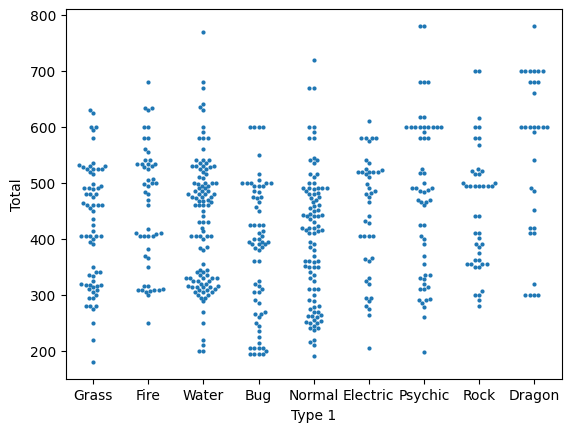

In [26]:
sns.swarmplot(data=Pokemon,
              x='Type 1',
              y='Total',
             s=3)
plt.show()

### 📉 Gráfico de banda

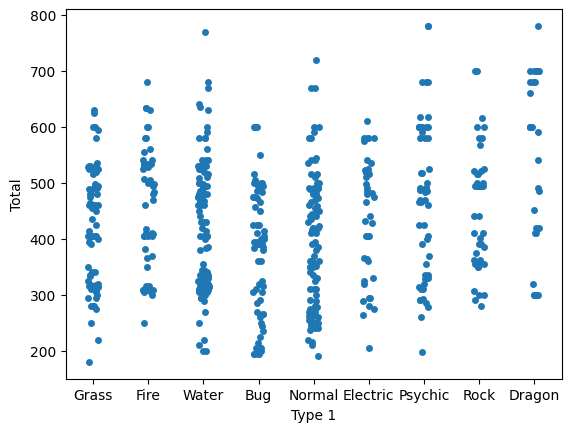

In [27]:
sns.stripplot(data=Pokemon,
              x='Type 1',
              y='Total',
             jitter=True)
plt.show()

### 💎 Gráfico de valores de letra

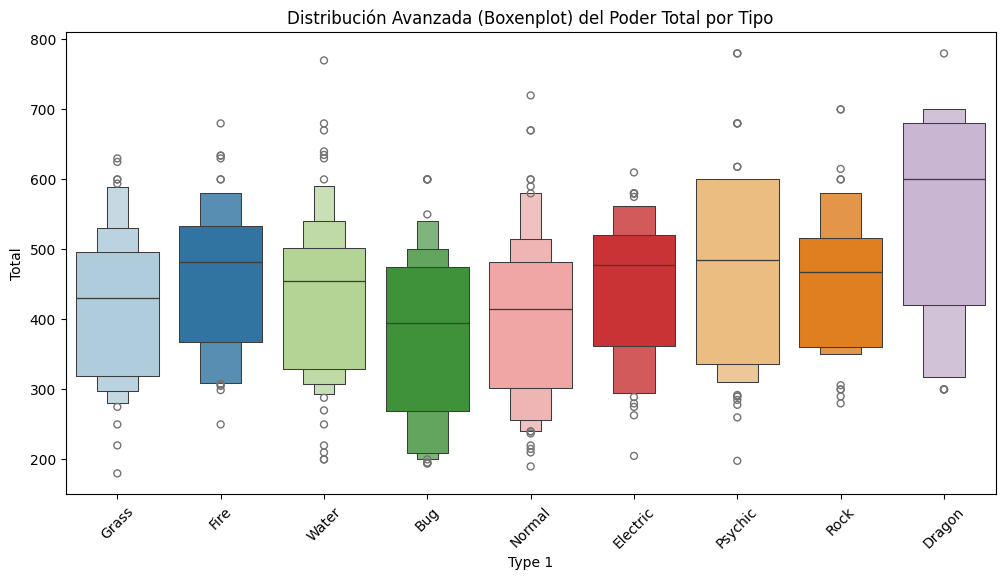

In [28]:
plt.figure(figsize=(12, 6))
sns.boxenplot(data=Pokemon, x='Type 1', y='Total', hue='Type 1', palette='Paired', legend=False)
plt.xticks(rotation=45)
plt.title('Distribución Avanzada (Boxenplot) del Poder Total por Tipo')
plt.show()

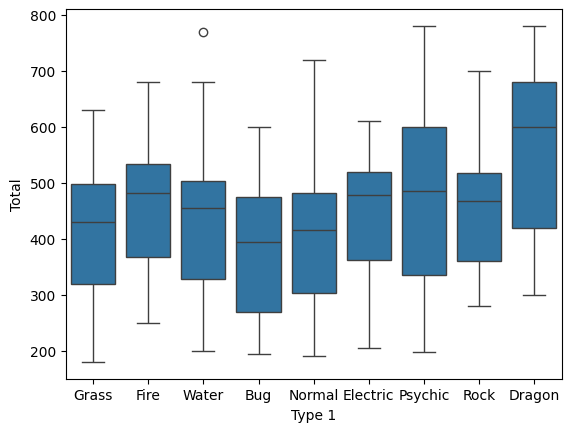

<Figure size 640x480 with 0 Axes>

In [29]:
sns.boxplot(data=Pokemon,
              x='Type 1',
            y='Total')

plt.show()
plt.clf()  

### 🎻 Gráfico de violín

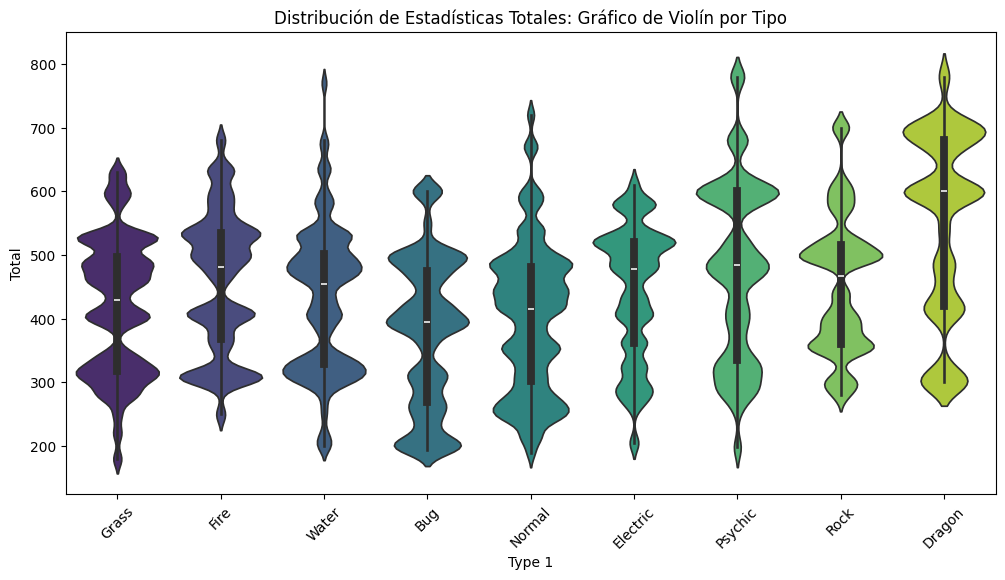

In [30]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=Pokemon, x='Type 1', y='Total', hue='Type 1', 
               bw_adjust=0.25, palette='viridis', legend=False)

plt.xticks(rotation=45)
plt.title('Distribución de Estadísticas Totales: Gráfico de Violín por Tipo')
plt.show()


### 📊Gráfico dinámico

In [37]:

units_sales= pd.read_csv(r'C:\Users\Outlet\Desktop\Nueva carpeta\Dinamico.csv',sep=';',header=0,index_col=False,encoding='Latin-1', engine='python')

units_sales.head()

Order Date  Africa  Canada  Caribbean  Central  Central Asia  East  EMEA  \
0  01/01/2014       3       0          0       22             0     4     8   
1  02/01/2014      10       0          0       53             0     4     0   
2  03/01/2014       9       0          0       29            10     0     5   
3  04/01/2014       4       0          0        3             0     0     4   
4  05/01/2014       0       0         12        7             0     0     0   

   North  North Asia  Oceania  South  Southeast Asia  West  
0      0           3        9     13               0    15  
1      0           8       18      6               8    11  
2      4          39       41     28               8     1  
3      0          21        3      0               6    17  
4      0           0        0      0               0     0

In [45]:

units_sales_acum = units_sales.cumsum(axis=0)


In [42]:
units_sales_acum.head()

Africa  Canada  Caribbean  Central  Central Asia  East  EMEA  \
Order Date                                                                 
01/01/2014       3       0          0       22             0     4     8   
02/01/2014      13       0          0       75             0     8     8   
03/01/2014      22       0          0      104            10     8    13   
04/01/2014      26       0          0      107            10     8    17   
05/01/2014      26       0         12      114            10     8    17   

            North  North Asia  Oceania  South  Southeast Asia  West  
Order Date                                                           
01/01/2014      0           3        9     13               0    15  
02/01/2014      0          11       27     19               8    26  
03/01/2014      4          50       68     47              16    27  
04/01/2014      4          71       71     47              22    44  
05/01/2014      4          71       71     47              22    44

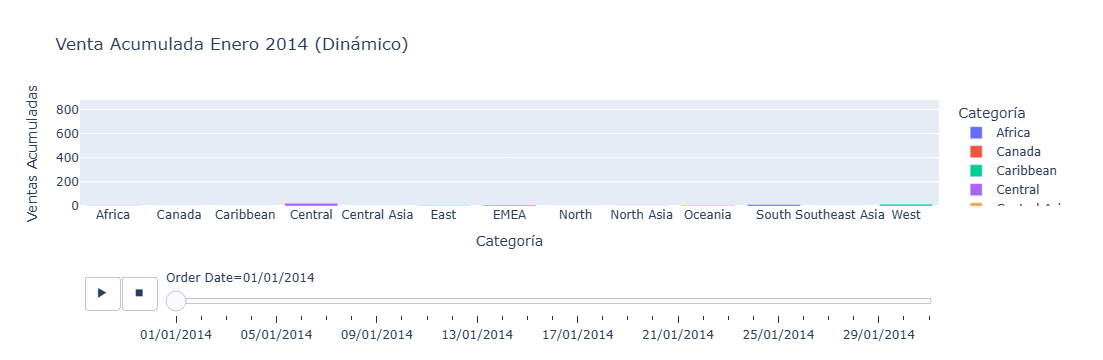

In [50]:
import plotly.express as px

# Preparar los datos para Plotly
# Necesitamos que la fecha sea una columna y no el índice
df_plotly = units_sales_acum.reset_index()

# Transformamos el formato de "ancho" a "largo" (necesario para animar)
df_melted = df_plotly.melt(id_vars='Order Date', var_name='Categoría', value_name='Ventas Acumuladas')

# Crear el gráfico animado
fig = px.bar(df_melted, 
             x="Categoría", 
             y="Ventas Acumuladas", 
             color="Categoría",
             animation_frame="Order Date", # Esto crea la línea de tiempo abajo
             range_y=[0, df_melted['Ventas Acumuladas'].max() * 1.1],
             title="Venta Acumulada Enero 2014 (Dinámico)")

# Ajustamos la velocidad (más rápido)
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 100

fig.show()